# 🌳 Decision Trees — Hands-On Examples

Decision Trees are intuitive, easy-to-visualize models for both classification and regression tasks. They work by recursively splitting data based on feature thresholds to maximize class purity or minimize regression error.

In this notebook, we'll cover:
- Visualizing a decision tree
- Making predictions and estimating probabilities
- Understanding how CART works
- Handling overfitting with hyperparameters
- Applying decision trees to regression problems
- Recognizing their limitations and solutions

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')
np.random.seed(42)  # For reproducibility

## 1. Visualizing a Decision Tree

Let's train a decision tree classifier on the Iris dataset and visualize it.

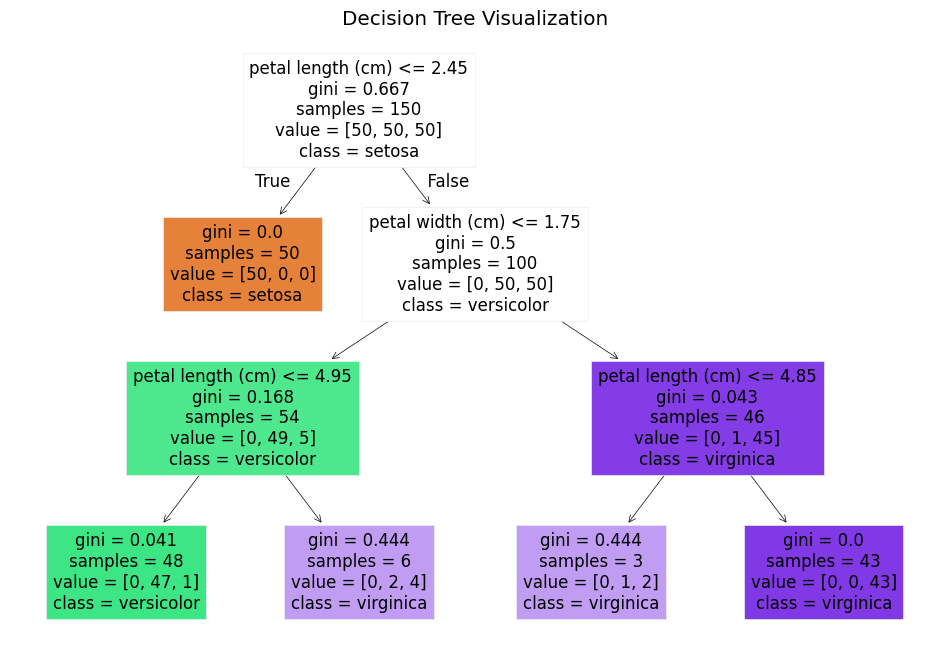

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train a decision tree classifier with max depth 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Plot the tree structure
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Visualization")
plt.show()

✨ This visualization shows how the tree splits data based on feature thresholds to classify Iris species.

## 2. Making Predictions

Let's see how the trained tree predicts the class for a sample.

In [3]:
# Select a sample (e.g., the 51st sample)
sample = X[50].reshape(1, -1)
predicted_class = clf.predict(sample)[0]
print("Sample features:", sample)
print("Predicted class:", iris.target_names[predicted_class])

Sample features: [[7.  3.2 4.7 1.4]]
Predicted class: versicolor


## 3. Estimating Class Probabilities

Decision trees can also output class probabilities.

In [4]:
# Predict class probabilities for the same sample
probabilities = clf.predict_proba(sample)
for idx, class_prob in enumerate(probabilities[0]):
    print(f"Probability of {iris.target_names[idx]}: {class_prob:.2f}")

Probability of setosa: 0.00
Probability of versicolor: 0.98
Probability of virginica: 0.02


## 4. How Decision Trees Are Built (CART)

- The CART algorithm recursively splits data to minimize impurity (Gini impurity for classification, MSE for regression).
- It chooses the feature and threshold that provide the best split at each node.
- The process continues until stopping criteria are met (max depth, min samples, etc.).

## 5. Computational Complexity

- Training complexity is roughly $O(n \log n)$ per feature, but can grow large with many features or deep trees.
- Prediction is fast, making decision trees suitable for real-time applications.

## 6. Gini Impurity vs. Entropy

- **Gini impurity**: computationally faster and tends to favor larger partitions.
- **Entropy**: more sensitive to class distribution but slightly slower.

You can specify the criterion:
```python
clf = DecisionTreeClassifier(criterion="gini")
clf = DecisionTreeClassifier(criterion="entropy")
```

## 7. Preventing Overfitting with Hyperparameters

- Limit tree depth with `max_depth`.
- Require minimum samples per split or leaf with `min_samples_split` and `min_samples_leaf`.
- Limit the total number of leaves with `max_leaf_nodes`.

Example:
```python
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
```

## 8. Regression with Decision Trees

Decision Trees also perform regression by splitting data to minimize variance (MSE).

In [5]:
# Load California Housing dataset
housing = fetch_california_housing()
Xh, yh = housing.data, housing.target

# Split into train/test sets
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.2, random_state=42)

# Train a regression tree
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(Xh_train, yh_train)

# Make a prediction for the first test sample
sample_input = Xh_test[0].reshape(1, -1)
predicted_value = regressor.predict(sample_input)[0]
print("Features of sample:", sample_input)
print("Predicted housing price:", predicted_value)

Features of sample: [[ 1.68120000e+00  2.50000000e+01  4.19220056e+00  1.02228412e+00
   1.39200000e+03  3.87743733e+00  3.60600000e+01 -1.19010000e+02]]
Predicted housing price: 1.168572668112798


## 9. Limitations & Ensemble Methods

- Decision Trees are **unstable**: small data changes can lead to big differences.
- Common practice: combine multiple trees into ensembles like **Random Forests** or **Gradient Boosting** for more stability and accuracy.

These methods mitigate overfitting and improve performance.

## **Summary**
- Decision Trees are simple yet powerful models for classification and regression.
- Visualization helps interpret their decision process.
- Hyperparameters control model complexity and prevent overfitting.
- For better performance, ensemble methods are often used.